# <font color="green">Shopify Fall 2022 Data Science Intern Challenge</font>

## Question 1 - Problem statement
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 
<ul>
<li>Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.</li>
<li>What metric would you report for this dataset?</li>
<li>What is its value?</li>
</ul>


### Import data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### Describe data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [3]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<font color="green"> Conclusion:
<ul>
<li>All the data type are in correct format, no need to modify data type of the data frame.</li>
<li>Direct Average mean of the order_amount field is <font color="red">3145.128 ~ 3145.13</font> which should not be the case, as the sneakers are quite affordable</li>
</ul>
</font>
Since we will not be using payment_method and created_at field for this analysis there is no need to convert them to string type or encode them.

### Data Analysis

#### <li> Analysis 1: Sorting data based on highest order amount

In [4]:
amount_sorted_data = data.sort_values('order_amount', inplace=False, ascending=False)
amount_sorted_data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


<font color="pink"> Observation: No hard evidence found, related to high AOV, but we can see there are some weird orders with high item counts. Noting this observation, Moving forward to find irregularity in AOV, we will find prices of each item to check if there is any shop with irregular pricing, to check if the data do not have any outliers or wrong data.</font>

#### <li> Analysis 2: Checking shop based AOV to see if there is any irregularities there

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
shop_based_aov = data.groupby(['shop_id']).mean('order_amount').reset_index()[['shop_id', 'order_amount']]
shop_based_aov

,shop_id,order_amount
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
95,96,330.000000
96,97,324.000000
97,98,245.362069
98,99,339.444444


<AxesSubplot:xlabel='shop_id', ylabel='order_amount'>

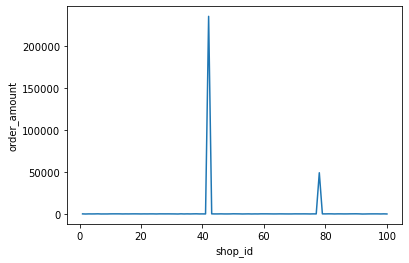

In [7]:
sns.lineplot(data=shop_based_aov, x="shop_id", y="order_amount")

<font color="pink"> Observation: Sudden spike of AOV in the graph shows there is certain shop in the data with very high or irregular data.</font>

In [8]:
shop_based_aov.sort_values('order_amount', ascending=False)

,shop_id,order_amount
41,42,235101.490196
77,78,49213.043478
49,50,403.545455
89,90,403.224490
37,38,390.857143
...,...,...
52,53,214.117647
99,100,213.675000
31,32,189.976190
1,2,174.327273


<font color="pink"> Observation: Shop number 42 and 78 shows very high AOVs. We will calculate price of the product for items from these shops</font>

In [9]:
product_based_price = data.groupby(['shop_id']).first().reset_index()

In [10]:
product_based_price['product_price'] = product_based_price.order_amount / product_based_price.total_items

<AxesSubplot:xlabel='shop_id', ylabel='product_price'>

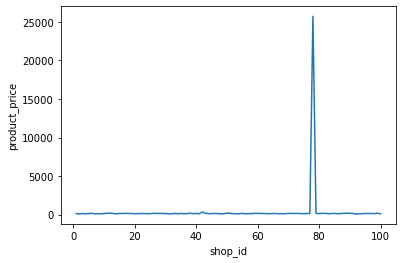

In [11]:
sns.lineplot(data=product_based_price, x="shop_id", y="product_price")

<font color="pink"> Observation: Shop number close to 80 shows very high product price which is clearly not affordable. We will find the shop with this exceptionally high value.</font>

In [12]:
product_based_price.sort_values('product_price', ascending=False)

,shop_id,order_id,user_id,order_amount,total_items,payment_method,created_at,product_price
77,78,161,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
41,42,16,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
11,12,108,732,201,1,credit_card,2017-03-21 20:26:18,201.0
88,89,206,747,588,3,debit,2017-03-04 4:01:38,196.0
98,99,45,759,195,1,credit_card,2017-03-02 8:13:24,195.0
...,...,...,...,...,...,...,...,...
52,53,1,746,224,2,cash,2017-03-13 12:36:56,112.0
99,100,14,709,111,1,cash,2017-03-22 2:39:49,111.0
31,32,217,862,202,2,debit,2017-03-09 16:46:07,101.0
1,2,125,983,188,2,credit_card,2017-03-13 13:07:20,94.0


<font color="green"> Conclusion: We can clearly see, that the product_price from  <font color="#C0000"><u><b>shop number 78 is way too high</b></u></font> and is not at all affordable. All the order records from the shop 78 are outliers for the analysis.</font>

### Fixing Outlier Values

<b>Assumption</b>
<li> Due to any technical faults, the product price from shop 78 was mistakenly registered without a decimal and is supposed to be 257.25 instead.

In [13]:
# Changing datatype of data-frame from integer to float to accept decimal values for pricing.
# (Also converting payment_method and created_at fields to clean and maintain the data quality)
data = data.astype({'order_amount': 'float', 'payment_method': 'string', 'created_at': 'string'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   int64  
 1   shop_id         5000 non-null   int64  
 2   user_id         5000 non-null   int64  
 3   order_amount    5000 non-null   float64
 4   total_items     5000 non-null   int64  
 5   payment_method  5000 non-null   string 
 6   created_at      5000 non-null   string 
dtypes: float64(1), int64(4), string(2)
memory usage: 273.6 KB


In [14]:
# replacing data with correct value
data.loc[data['shop_id'] == 78, 'order_amount'] /= 100

In [15]:
data[(data.shop_id == 78) & (data.total_items == 1)].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,257.25,1,credit_card,2017-03-12 5:56:57
1056,1057,78,800,257.25,1,debit,2017-03-15 10:16:45
1193,1194,78,944,257.25,1,debit,2017-03-16 16:38:26
1204,1205,78,970,257.25,1,credit_card,2017-03-17 22:32:21
1384,1385,78,867,257.25,1,cash,2017-03-17 16:38:06


<font color="pink"> Result: data has been replaced with corrected price for shop_id 78.</font>

### Calculating AOV with corrected data

#### <li>based on problem statement technique 
<center>AOV = <b><i>sum(</i></b>order_amount<b><i>)</i></b>/<b><i>count(</i></b>order_id<b><i>)</i></b></center>

In [16]:
data.order_amount.mean()

2696.8956

<font color="green"> Result: AOV is 2696.8956 </font>

#### Analysis of data to propose new metric for AOV

##### <li> order counts for each shop or sneaker model

In [17]:
shop_order_count = data.groupby('shop_id').size().reset_index(name='count')

<AxesSubplot:xlabel='shop_id', ylabel='count'>

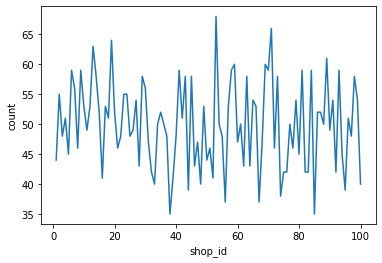

In [18]:
sns.lineplot(data=shop_order_count, x="shop_id", y="count")

<font color="pink"> No hard observations can be made based on the visualization </font>

##### <li> overall order item variations
<font color="orange">Based on the observation noted during Analysis 1.</font>

<AxesSubplot:xlabel='order_id', ylabel='total_items'>

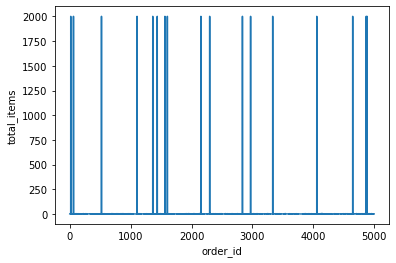

In [19]:
sns.lineplot(data=data, x="order_id", y="total_items")

<font color="pink">Weird spikes in total items in an order shows. This shows presence of exceptional orders with very large quantity of items contributing to the calculation AOVs. These exceptional orders should not be the part of AOVs as they are rare and can possible be an error or outlier data.</font>

#### <li>New technique Proposal

Such exceptional orders are rare and should not be included in the calculation of AOVs, as AOV can be part of important decision making such as minimum order value to provide free shipping etc.

##### Exploring total order items column.

<AxesSubplot:xlabel='index', ylabel='total_item_value'>

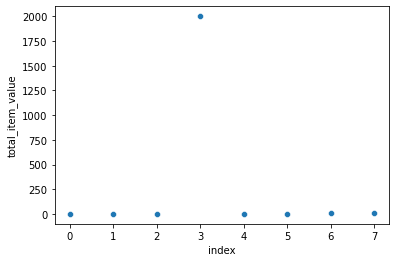

In [20]:
unique_total_items_value = pd.DataFrame({'index': range(0, data.total_items.nunique()), 'total_item_value': data.total_items.unique()})
sns.scatterplot(data=unique_total_items_value, x='index', y='total_item_value')

In [21]:
# counting exceptional orders
data[data.total_items > 10].count()

order_id          17
shop_id           17
user_id           17
order_amount      17
total_items       17
payment_method    17
created_at        17
dtype: int64

<font color="pink">General order items tend to be in the range of 10, while there are 17 order with item count as high as 2000, which is rare.</font>

##### Removing exception orders from the data

In [22]:
# Removing exception orders from the data
data_without_exception_orders = data[data.total_items <= 10]

<AxesSubplot:xlabel='index', ylabel='total_item_value'>

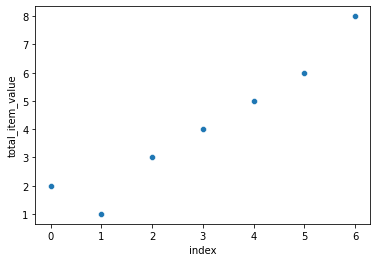

In [23]:
data_without_exception_orders_unique_total_items_value = pd.DataFrame({'index': range(0, data_without_exception_orders.total_items.nunique()), 'total_item_value': data_without_exception_orders.total_items.unique()})
sns.scatterplot(data=data_without_exception_orders_unique_total_items_value, x='index', y='total_item_value')

<font color="pink"> Result: removed exceptional orders from the data before calculating AOV.</font>

##### Calculation of AOV based on filtered and corrected data.

In [24]:
data_without_exception_orders.order_amount.mean()

304.330323098535

<font color="green"> Result: AOV based on suggested method is 304.330 which sounds more reasonable. This value can be an important meaningful insight for critical decision makings.</font>

## Question 2 - Problem statement
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.
<ol type="a">
<li>How many orders were shipped by Speedy Express in total?</li>
<li>What is the last name of the employee with the most orders?</li>
<li>What product was ordered the most by customers in Germany?</li>
<ol>


### A. How many orders were shipped by Speedy Express in total?

In [25]:
# SELECT ShipperName, COUNT(DISTINCT OrderID) as "Order Count"
# FROM Orders
# LEFT JOIN Shippers
# USING (ShipperID)
# WHERE ShipperName = 'Speedy Express';

<h5><b><font color="green"> Result: 54 orders were shipped by Speedy Express.</font></b></h5>

Explanation: Shipper ID is included in the Orders table, but the Shipper Name is only included in the Shippers table. Because of this we need to join the two tables, so that for each order we have an associated shipper name. Once we do that, we just need to count how many orders each shipper name has. We do so by selecting shipper name and a count of order id’s by shipper name. To stay on the conservative side we use DISTINCT order id’s, so that if an order is repeated by mistake in the table it won’t be double counted. Finally, once we have the order count by shipper name we filter for only the shipper with name ‘Speedy Express’ as the question asks.

### B. What is the last name of the employee with the most orders?

In [26]:
# Select LastName, count(distinct(OrderId)) as "Order Count" 
# from Orders 
#   LEFT JOIN Employees 
#   using (EmployeeID) 
# group by EmployeeID 
# order by "Order Count" desc
# limit 1;

<h5><b><font color="green"> Peacock with 40 orders.</font></b></h5>

Explanation: Again we need to join two tables because the employee names are contained only in the Employees table, while the orders info is contained in the orders table. We count the distinct order ids and group them by last name. We sort them from biggest to smallest number of orders using DESC, and limit the query result to the first row to see only information of the employee with the most orders.

### C. What product was ordered the most by customers in Germany?

In [27]:
# Select ProductName as "Most Purchased Product from customers in Germany"
# from (
#   Select od.ProductID, SUM(od.Quantity) as count 
#   from OrderDetails as od 
#   where od.OrderID in (
#     Select distinct OrderID 
#     from Orders as o 
#     where o.CustomerID in (
#       Select CustomerID 
#       from Customers as c 
#       where c.Country == 'Germany'
#     )
#   ) 
#     group by od.ProductID 
#     order by count desc 
#     limit 1
# )
# LEFT JOIN Products 
# using (ProductID);

<h5><b><font color="green"> Boston Crab Meat was ordered the most in Germany with a total order quantity of 160.
</font></b></h5>

Explanation: In this question we are required to gather data from four different tables, because the information is spread across all the four tables. We first get the CustomerIds of all the customers from Germany from the Customers table and then find distinct OrderIDs from the Orders table where the CustomerID is in the previously fetched CustomerIDs (customers from germany).
We then find the sum of quantity of products from the OrderDetails table of the Orders in the above fetched OrderIds. The resulting table is sorted in descending order of their sum and the one with highest value is selected. The Product with highest selling quantity for customers in germany is then left joined with the Products table to get the product name for the output.